In [228]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [238]:
data = pd.read_csv('IPO.csv')
data.head()


Issuer Company Listing Date  \
0                                   MSTC Limited IPO    29-Mar-19   
1                          Chalet Hotels Limited IPO     7-Feb-19   
2                Xelpmoc Design and Tech Limited IPO     4-Feb-19   
3  Garden Reach Shipbuilders & Engineers Limited IPO    10-Oct-18   
4                       Aavas Financiers Limited IPO     8-Oct-18   

   Issue Price  Issue Size   QIB   NII   RII   EMP  Total  Open Price  \
0          120      212.04  1.13  2.15  2.95  1.54   1.46       111.0   
1          280     1641.18  4.66  1.10  0.03   NaN   1.57       291.0   
2           66       23.00  1.24  7.69  2.64   NaN   3.25        57.0   
3          118      344.69  1.81  0.31  0.24  0.14   1.02       104.0   
4          821     1734.07  2.77  0.26  0.25   NaN   0.97       758.0   

   Low Price  High Price  Close Price  Change  Year  
0     110.05      116.55       114.20   -4.83  2019  
1     250.15      295.30       290.40    3.71  2019  
2      55.15       59.85        59.85   -9.32  2019  
3      95.35      109.50       105.10  -10.93  2018  
4     710.00      787.50       773.15   -5.83  2018

In [239]:
data.describe()

Issue Price    Issue Size          QIB         NII         RII  \
count   400.000000    400.000000   366.000000  373.000000  373.000000   
mean    258.362500    691.130650    52.294617   48.941877    8.119464   
std     267.639952   1618.013118   522.822077  102.519460   13.491152   
min      10.000000      6.000000     0.010000    0.020000    0.030000   
25%      82.000000     66.082500     1.315000    1.810000    1.210000   
50%     166.500000    166.505000     5.665000    5.110000    3.250000   
75%     328.500000    600.000000    35.387500   48.410000    8.700000   
max    1766.000000  15199.440000  9999.000000  958.070000  123.800000   

              EMP       Total   Open Price   Low Price   High Price  \
count  159.000000  375.000000   400.000000   400.00000   400.000000   
mean     1.032264   22.815493   294.127500   273.95550   331.483375   
std      1.558048   38.569350   322.120466   314.62345   350.476124   
min      0.010000    0.440000     9.500000     4.75000     9.500000   
25%      0.335000    1.640000    89.500000    76.45000   107.037500   
50%      0.890000    4.800000   180.000000   161.92500   204.500000   
75%      1.130000   29.340000   399.000000   355.33750   447.850000   
max     16.040000  273.050000  2725.000000  2725.00000  3020.250000   

       Close Price      Change         Year  
count   400.000000  400.000000   400.000000  
mean    303.455675   17.775575  2011.022500  
std     336.128338   45.043098     3.874859  
min       5.250000  -69.830000  2006.000000  
25%      90.650000   -7.150000  2007.000000  
50%     180.925000    6.025000  2010.000000  
75%     408.912500   31.480000  2015.000000  
max    2892.800000  286.250000  2019.000000

In [240]:
data = data.drop(['Low Price', 'High Price', 'Close Price','Change','EMP', 'Listing Date'], axis=1)

In [241]:
data.describe()

Issue Price    Issue Size          QIB         NII         RII  \
count   400.000000    400.000000   366.000000  373.000000  373.000000   
mean    258.362500    691.130650    52.294617   48.941877    8.119464   
std     267.639952   1618.013118   522.822077  102.519460   13.491152   
min      10.000000      6.000000     0.010000    0.020000    0.030000   
25%      82.000000     66.082500     1.315000    1.810000    1.210000   
50%     166.500000    166.505000     5.665000    5.110000    3.250000   
75%     328.500000    600.000000    35.387500   48.410000    8.700000   
max    1766.000000  15199.440000  9999.000000  958.070000  123.800000   

            Total   Open Price         Year  
count  375.000000   400.000000   400.000000  
mean    22.815493   294.127500  2011.022500  
std     38.569350   322.120466     3.874859  
min      0.440000     9.500000  2006.000000  
25%      1.640000    89.500000  2007.000000  
50%      4.800000   180.000000  2010.000000  
75%     29.340000   399.000000  2015.000000  
max    273.050000  2725.000000  2019.000000

In [242]:
y = data['Open Price']
x1 = data.drop(['Open Price'],axis=1)

In [243]:
x1.head()

Issuer Company  Issue Price  Issue Size  \
0                                   MSTC Limited IPO          120      212.04   
1                          Chalet Hotels Limited IPO          280     1641.18   
2                Xelpmoc Design and Tech Limited IPO           66       23.00   
3  Garden Reach Shipbuilders & Engineers Limited IPO          118      344.69   
4                       Aavas Financiers Limited IPO          821     1734.07   

    QIB   NII   RII  Total  Year  
0  1.13  2.15  2.95   1.46  2019  
1  4.66  1.10  0.03   1.57  2019  
2  1.24  7.69  2.64   3.25  2019  
3  1.81  0.31  0.24   1.02  2018  
4  2.77  0.26  0.25   0.97  2018

In [244]:
data.isnull().sum()

Issuer Company     0
Issue Price        0
Issue Size         0
QIB               34
NII               27
RII               27
Total             25
Open Price         0
Year               0
dtype: int64

In [245]:
data=data.dropna(axis=0)

In [246]:
data.describe(include='all')

Issuer Company  Issue Price    Issue Size          QIB  \
count                      364   364.000000    364.000000   364.000000   
unique                     364          NaN           NaN          NaN   
top     Coal India Limited IPO          NaN           NaN          NaN   
freq                         1          NaN           NaN          NaN   
mean                       NaN   277.642857    733.712363    52.549121   
std                        NaN   272.702613   1659.343851   524.248921   
min                        NaN    10.000000     14.000000     0.010000   
25%                        NaN   100.000000     80.992500     1.325000   
50%                        NaN   180.500000    214.180000     5.665000   
75%                        NaN   362.500000    619.310000    35.492500   
max                        NaN  1766.000000  15199.440000  9999.000000   

               NII         RII       Total   Open Price         Year  
count   364.000000  364.000000  364.000000   364.000000   364.000000  
unique         NaN         NaN         NaN          NaN          NaN  
top            NaN         NaN         NaN          NaN          NaN  
freq           NaN         NaN         NaN          NaN          NaN  
mean     50.107665    8.233352   23.441181   316.357830  2011.236264  
std     103.509901   13.636770   38.976427   329.057191     3.907921  
min       0.030000    0.030000    0.440000     9.500000  2007.000000  
25%       1.840000    1.180000    1.730000   104.000000  2008.000000  
50%       5.535000    3.160000    5.040000   200.000000  2010.000000  
75%      49.112500    9.025000   30.892500   411.612500  2015.000000  
max     958.070000  123.800000  273.050000  2725.000000  2019.000000

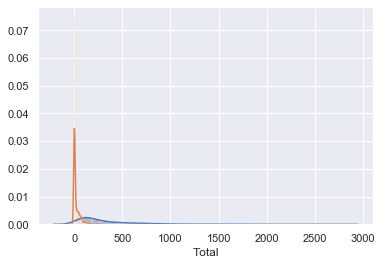

In [247]:
sns.distplot(data['Open Price'])
sns.distplot(data['Total'])

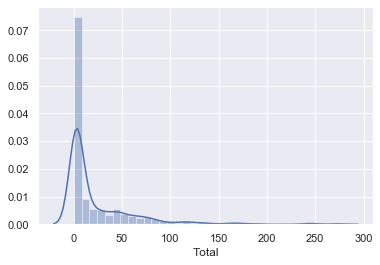

In [248]:
sns.distplot(data['Total'])

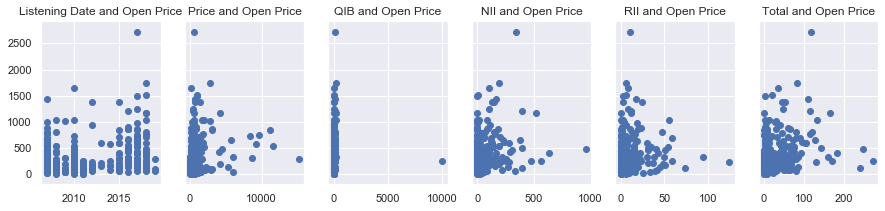

In [250]:
f, (ax1, ax2, ax3, ax4, ax5, ax6 ) = plt.subplots(1, 6, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data['Year'],data['Open Price'])
ax1.set_title('Listening Date and Open Price')

ax2.scatter(data['Issue Size'],data['Open Price'])
ax2.set_title('Price and Open Price')

ax3.scatter(data['QIB'],data['Open Price'])
ax3.set_title('QIB and Open Price')

ax4.scatter(data['NII'],data['Open Price'])
ax4.set_title('NII and Open Price')

ax5.scatter(data['RII'],data['Open Price'])
ax5.set_title('RII and Open Price')

ax6.scatter(data['Total'],data['Open Price'])
ax6.set_title('Total and Open Price')


plt.show()

In [133]:
type(data['Listing Date'])

pandas.core.series.Series

# Multicollinearity

In [251]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data.columns.values

array(['Issuer Company', 'Issue Price', 'Issue Size', 'QIB', 'NII', 'RII',
       'Total', 'Open Price', 'Year'], dtype=object)

In [262]:
variables = data[['Issue Price', 'Issue Size', 'QIB','RII', 'Total']]
# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

variables.head()

Issue Price  Issue Size   QIB   RII  Total
0          120      212.04  1.13  2.95   1.46
1          280     1641.18  4.66  0.03   1.57
2           66       23.00  1.24  2.64   3.25
3          118      344.69  1.81  0.24   1.02
4          821     1734.07  2.77  0.25   0.97

In [263]:
variables.describe()

Issue Price    Issue Size          QIB         RII       Total
count   364.000000    364.000000   364.000000  364.000000  364.000000
mean    277.642857    733.712363    52.549121    8.233352   23.441181
std     272.702613   1659.343851   524.248921   13.636770   38.976427
min      10.000000     14.000000     0.010000    0.030000    0.440000
25%     100.000000     80.992500     1.325000    1.180000    1.730000
50%     180.500000    214.180000     5.665000    3.160000    5.040000
75%     362.500000    619.310000    35.492500    9.025000   30.892500
max    1766.000000  15199.440000  9999.000000  123.800000  273.050000

In [265]:
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

VIF     Features
0  1.610146  Issue Price
1  1.274678   Issue Size
2  1.216699          QIB
3  2.466143          RII
4  3.119191        Total

In [266]:
data_no_multicollinearity = data.drop(['NII'],axis=1)

In [268]:
data_no_multicollinearity.head()

Issuer Company  Issue Price  Issue Size  \
0                                   MSTC Limited IPO          120      212.04   
1                          Chalet Hotels Limited IPO          280     1641.18   
2                Xelpmoc Design and Tech Limited IPO           66       23.00   
3  Garden Reach Shipbuilders & Engineers Limited IPO          118      344.69   
4                       Aavas Financiers Limited IPO          821     1734.07   

    QIB   RII  Total  Open Price  Year  
0  1.13  2.95   1.46       111.0  2019  
1  4.66  0.03   1.57       291.0  2019  
2  1.24  2.64   3.25        57.0  2019  
3  1.81  0.24   1.02       104.0  2018  
4  2.77  0.25   0.97       758.0  2018

# Data with Dummies

In [270]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [272]:
data_with_dummies.head()

Issue Price  Issue Size   QIB   RII  Total  Open Price  Year  \
0          120      212.04  1.13  2.95   1.46       111.0  2019   
1          280     1641.18  4.66  0.03   1.57       291.0  2019   
2           66       23.00  1.24  2.64   3.25        57.0  2019   
3          118      344.69  1.81  0.24   1.02       104.0  2018   
4          821     1734.07  2.77  0.25   0.97       758.0  2018   

   Issuer Company_A2Z Maintenance & Engineering Services Ltd IPO  \
0                                                  0               
1                                                  0               
2                                                  0               
3                                                  0               
4                                                  0               

   Issuer Company_AMD Metplast Limited IPO  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Issuer Company_ARSS Infrastructure Projects Ltd IPO  ...  \
0                                                  0    ...   
1                                                  0    ...   
2                                                  0    ...   
3                                                  0    ...   
4                                                  0    ...   

   Issuer Company_Varun Beverages Ltd IPO  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Issuer Company_Vascon Engineers Limited IPO  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Issuer Company_Vaswani Industries Ltd IPO  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Issuer Company_Vijayeswari Textiles Limited IPO  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Issuer Company_Vishal Information Technologies Ltd IPO  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

   Issuer Company_Vishal Retail Ltd IPO  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Issuer Company_Wonderla Holidays Ltd IPO  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Issuer Company_Xelpmoc Design and Tech Limited IPO  \
0                                                  0    
1                                                  0    
2                                                  1    
3                                                  0    
4                                                  0    

   Issuer Company_Zylog Systems Limited IPO  \
0                                         0   
1  

In [273]:
data_preprocessed = data_with_dummies

In [275]:
targets = data_preprocessed['Open Price']
inputs = data_preprocessed.drop(['Open Price'], axis=1)

In [276]:
from sklearn.preprocessing import StandardScaler

In [277]:
Scaler = StandardScaler()

In [278]:
Scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [280]:
input_scaled=Scaler.transform(inputs)

In [281]:
from sklearn.model_selection import train_test_split

In [290]:
x_train,x_test, y_train,y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=376)

In [292]:
x_train, y_train

(array([[ 1.70225548e-01, -3.06996399e-01, -5.16287671e-02, ...,
         -5.24863881e-02, -5.24863881e-02, -5.24863881e-02],
        [-8.79979528e-01, -4.19846667e-01, -9.91715644e-02, ...,
         -5.24863881e-02, -5.24863881e-02, -5.24863881e-02],
        [-2.80649209e-02, -3.76396296e-01, -1.33691356e-02, ...,
         -5.24863881e-02, -5.24863881e-02, -5.24863881e-02],
        ...,
        [-6.22936328e-01, -4.21132074e-01,  1.89988790e+01, ...,
         -5.24863881e-02, -5.24863881e-02, -5.24863881e-02],
        [ 5.96182852e-01, -1.53338991e-01, -6.75973402e-02, ...,
         -5.24863881e-02, -5.24863881e-02, -5.24863881e-02],
        [-6.30280419e-01, -3.66016486e-01, -8.68704147e-02, ...,
         -5.24863881e-02, -5.24863881e-02, -5.24863881e-02]]), 182     333.55
 262      35.00
 343     472.50
 42      399.00
 296     399.70
 384     500.00
 102     295.00
 280      93.45
 23     1520.00
 206      28.00
 39     1250.00
 304     400.00
 272     151.00
 297     701.10
 1    

# Create the Regression

In [293]:
reg = LinearRegression()

In [294]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [295]:
y_hat = reg.predict(x_train)

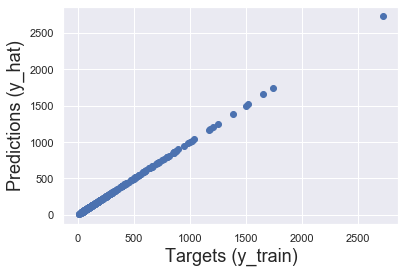

In [301]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.show()

Text(0.5, 1.0, 'Residuals PDF')

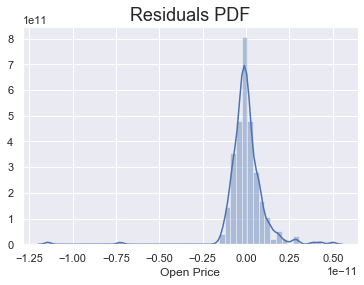

In [302]:
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)


In [303]:
reg.score(x_train,y_train)

1.0

In [304]:
reg.intercept_

282.3396122085755

In [306]:
reg.coef_

array([ 1.49889190e+02,  2.82526687e+01, -1.54048486e+00, -2.47760810e+00,
        5.39977700e+01,  4.83036361e+01, -5.66603464e+00,  7.22630767e-01,
        1.50728719e+01,  2.35679404e+00, -5.31315973e+00,  1.76153608e+00,
        1.23438763e+00, -3.06260369e+00, -2.07846349e+00,  2.28710980e+01,
        1.41416213e+01, -3.26496549e-01, -5.31315973e+00,  8.49881631e-01,
       -5.31315973e+00,  7.65449257e+00,  9.10805694e-01,  1.73300799e+01,
        6.64070948e-01,  6.16683738e+00, -1.71008546e+00, -7.96851101e+00,
        2.94733689e+00,  8.44425903e-01, -5.31315973e+00,  1.96335783e+00,
        4.70673857e+00, -5.31315973e+00,  5.21345656e-01, -4.17984414e+00,
        8.86763522e-01, -5.31315973e+00, -5.31315973e+00,  4.09503895e+00,
        5.82788989e+00,  7.22639243e+00,  1.86967301e+01,  3.65692117e+00,
        1.54996884e+01,  2.27012680e+00, -5.31315973e+00,  2.81068382e-01,
        3.93780011e-01,  9.35339557e-01, -1.70443962e+00, -5.31315973e+00,
       -4.93200576e+00, -

In [336]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary.head()

Features  Weights
0  Issue Price   149.89
1   Issue Size    28.25
2          QIB    -1.54
3          RII    -2.48
4        Total    54.00

In [308]:
# Check the different categories in the 'Brand' variable
data['Issuer Company'].unique()

array(['MSTC Limited IPO', 'Chalet Hotels Limited IPO',
       'Xelpmoc Design and Tech Limited IPO',
       'Garden Reach Shipbuilders & Engineers Limited IPO',
       'Aavas Financiers Limited IPO', 'IRCON International Limited IPO',
       'CreditAccess Grameen Limited IPO',
       'HDFC Asset Management Company Limited IPO',
       'TCNS Clothing Co. Limited IPO', 'Varroc Engineering Limited IPO',
       'RITES Limited IPO', 'Fine Organic Industries Limited IPO',
       'IndoStar Capital Finance Limited IPO',
       'Lemon Tree Hotels Limited IPO', 'Mishra Dhatu Nigam Limited IPO',
       'ICICI Securities Ltd IPO', 'Karda Construction Ltd IPO',
       'Sandhar Technologies Limited IPO',
       'Hindustan Aeronautics Limited IPO', 'Bandhan Bank Limited IPO',
       'Bharat Dynamics Ltd IPO', 'H.G. Infra Engineering Ltd IPO',
       'Aster DM Healthcare Ltd IPO', 'Galaxy Surfactants Limited IPO',
       'Amber Enterprises India Limited IPO',
       'Newgen Software Technologies Limi

# Testing

In [309]:
y_hat_test = reg.predict(x_test)

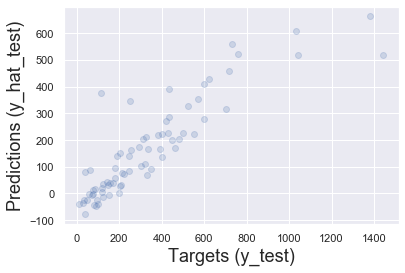

In [312]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [335]:
pf_df = pd.DataFrame(y_hat_test, columns=['Prediction'])
pf_df.head()

Prediction
0      149.73
1      -41.16
2       -4.29
3       -1.65
4      222.02

In [334]:
pf_df.head()

Prediction  Target  Residuals  Residuals %
0      149.73  204.90     -55.17        26.92
1      -41.16   10.10     -51.26       507.52
2       -4.29  150.00    -154.29       102.86
3       -1.65   56.25     -57.90       102.94
4      222.02  400.00    -177.98        44.50

In [325]:
pf_df['Target'] = (y_test)
pf_df.head()

Prediction  Target
0  149.731638  204.90
1  -41.159826   10.10
2   -4.288997  150.00
3   -1.652845   56.25
4  222.019227  400.00

In [324]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    204.90
1     10.10
2    150.00
3     56.25
4    400.00
Name: Open Price, dtype: float64

In [326]:
pf_df['Target'] = (y_test)
pf_df.head()

Prediction  Target
0  149.731638  204.90
1  -41.159826   10.10
2   -4.288997  150.00
3   -1.652845   56.25
4  222.019227  400.00

In [329]:
pf_df['Residuals'] = pf_df['Prediction'] - pf_df['Target']
pf_df['Residuals %'] = np.absolute((pf_df['Prediction'] - pf_df['Target'])/pf_df['Target']*100)

In [331]:
pf_df.head()

Prediction  Target   Residuals  Residuals %
0  149.731638  204.90  -55.168362    26.924530
1  -41.159826   10.10  -51.259826   507.523031
2   -4.288997  150.00 -154.288997   102.859331
3   -1.652845   56.25  -57.902845   102.938391
4  222.019227  400.00 -177.980773    44.495193

In [333]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
pf_df.sort_values(by=['Residuals %'])

Prediction  Target  Residuals  Residuals %
18      391.51  435.00     -43.49        10.00
23      558.43  733.30    -174.87        23.85
43      140.71  190.05     -49.34        25.96
0       149.73  204.90     -55.17        26.92
22      428.37  621.00    -192.63        31.02
39      520.30  758.00    -237.70        31.36
53      409.53  600.00    -190.47        31.75
24      285.25  432.00    -146.75        33.97
54      210.82  323.75    -112.93        34.88
17      202.92  313.00    -110.08        35.17
14      269.92  420.00    -150.08        35.73
37      457.93  715.00    -257.07        35.95
28      161.95  254.10     -92.15        36.26
67      328.33  525.00    -196.67        37.46
72      352.58  570.00    -217.42        38.14
68      347.42  250.00      97.42        38.97
50      172.52  291.00    -118.48        40.72
20      607.71 1032.00    -424.29        41.11
66       87.71   61.60      26.11        42.39
40      218.91  381.00    -162.09        42.54
69      138.91  245.00    -106.09        43.30
4       222.02  400.00    -177.98        44.50
21       95.05  180.00     -84.95        47.20
7       225.72  430.00    -204.28        47.51
9       517.77 1044.00    -526.23        50.41
49      164.26  335.00    -170.74        50.97
19      662.06 1380.00    -717.94        52.02
8       276.73  599.00    -322.27        53.80
11      225.07  500.00    -274.93        54.99
32      314.63  701.35    -386.72        55.14
15      199.08  450.00    -250.92        55.76
31      164.74  390.00    -225.26        57.76
55      201.69  480.00    -278.31        57.98
36      222.36  550.00    -327.64        59.57
65      170.96  461.00    -290.04        62.92
10      517.64 1443.75    -926.11        64.15
64       75.36  213.35    -137.99        64.68
35      110.65  320.00    -209.35        65.42
46      137.79  400.00    -262.21        65.55
38       83.83  246.00    -162.17        65.92
12      101.70  300.20    -198.50        66.12
6        70.94  224.40    -153.46        68.39
16       56.63  180.00    -123.37        68.54
56       43.03  140.00     -96.97        69.26
60       36.53  125.00     -88.47        70.78
58       90.80  350.00    -259.20        74.06
29       39.35  155.00    -115.65        74.61
33       37.48  170.05    -132.57        77.96
30       30.11  145.00    -114.89        79.23
13       68.69  332.50    -263.81        79.34
47       21.49  119.00     -97.51        81.94
51       15.27   86.05     -70.78        82.26
34       11.35   75.10     -63.75        84.89
41       30.46  207.00    -176.54        85.28
63       29.10  201.20    -172.10        85.54
44        6.37  120.00    -113.63        94.69
62        1.08  201.15    -200.07        99.46
2        -4.29  150.00    -154.29       102.86
3        -1.65   56.25     -57.90       102.94
5        -3.77   74.00     -77.77       105.09
59       -5.58   73.00     -78.58       107.64
27       81.08   39.00      42.08       107.90
70      -14.73  125.00    -139.73       111.79
45      -23.98   93.05    -117.03       125.77
25      -38.64  100.15    -138.79       138.58
48      -23.26   50.00     -73.26       146.51
26      -48.75   92.00    -140.75       152.99
71      -43.31   79.85    -123.16       154.23
61      -25.29   35.00     -60.29       172.25
52      -37.59   29.75     -67.34       226.35
42      375.64  114.00     261.64       229.51
57      -77.70   36.95    -114.65       310.30
1       -41.16   10.10     -51.26       507.52